In [22]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import Tuple, List

from sklearn.model_selection import train_test_split

In [47]:
def circle_f(x: float, y: float, r: float) -> Tuple[float, float]:
    return x + np.random.normal(0, r), y + np.random.normal(0, r)

In [48]:
def make_data_arrays(center_x, center_y, radius, count):
    circle_x = []
    circle_y = []

    for i in range(count):
        x, y = circle_f(center_x, center_y, radius)
        circle_x.append(x)
        circle_y.append(y)

    return circle_x, circle_y

In [49]:
data_params = (
    (5, 5, 0.3, 500, 1),
    (7, 7, 0.4, 500, 2),
    (2, 2, 0.5, 500, 3),
    (3.5, 3.5, 0.4, 500, 1),
    (3, 6, 0.6, 500, 3),
    (6, 2, 0.5, 500, 4),
)
data = []
class_to_color = {
    1: 'r',
    2: 'b',
    3: 'orange',
    4: 'g'
}
class_count = 4

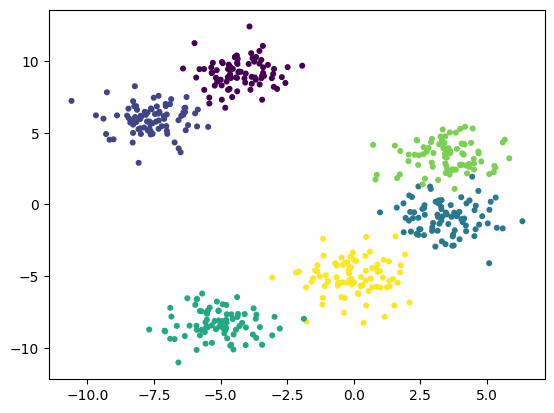

In [46]:
for center_x, center_y, radius, count, class_num in data_params:
    x_data, y_data = make_data_arrays(center_x, center_y, radius, count)
    data.append([x_data, y_data, [class_num] * count])

In [6]:
xs = ys = cs = []
for x, y, c in data:
    xs = np.concatenate([xs, x])
    ys = np.concatenate([ys, y])
    cs = np.concatenate([cs, c])

In [7]:
xs.shape, ys.shape, cs.shape

((3000,), (3000,), (3000,))

In [8]:
df = pd.DataFrame(xs, columns=['x'])
df['y'] = ys
df['class'] = cs
df.head()

,x,y,class
0,4.769331,4.772748,1.0
1,5.362215,5.172929,1.0
2,4.576700,5.318851,1.0
3,4.577833,5.526082,1.0
4,4.604843,5.241050,1.0


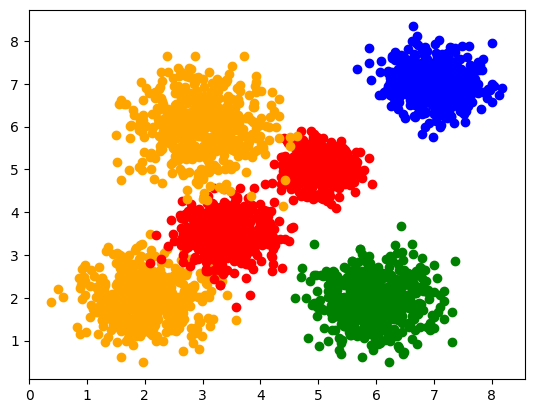

In [10]:
# import matplotlib
# matplotlib.use("TkAgg")

plt.ion()

for x_data, y_data, class_num in data:

    plt.scatter(x_data, y_data, c=class_to_color[class_num[0]])
    # x = np.arange(0, 8.5, 0.01)
    # y = np.arange(0, 8.5, 0.01)
    # plt.fill(x, y)
    plt.draw()
    plt.pause(0.1)

plt.ioff()
plt.show()

In [11]:
labels = df.pop('class')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, train_size=0.8)

In [13]:
x_train.shape, x_test.shape

((2400, 2), (600, 2))

In [14]:
def sigmoid(x, derivative=False):
    if not derivative:
        a = 1.0 / (1.0 + math.exp(-x))
        return a
    else:
        a = x * (1.0 - x)
        return a

In [14]:
class Neuron:
    def __init__(self, inputs_count):
        self.weights = 2 * np.random.random(inputs_count) - 1
        self.delta = 0
        self.output = 0

    def _weights_to_input(self, inputs):
        output = self.weights[-1]
        for i in range(len(self.weights) - 1):
            output += self.weights[i] * inputs[i]
        return output

    def get_output(self, inputs, activation_func):
        output = self._weights_to_input(inputs)
        self.output = activation_func(output, False)
        return self.output

    def update_weights(self, inputs, alpha):
        for j in range(len(inputs)):
            self.weights[j] += alpha * self.delta * inputs[j]
        self.weights[-1] += alpha * self.delta

In [15]:
class Perceptron:
    def __init__(self, layers_size):
        self.layers = []
        previous_layer_size = layers_size[0]

        for layer_size in layers_size:
            self.layers.append(
                [Neuron(previous_layer_size + 1) for _ in range(layer_size)]
            )
            previous_layer_size = layer_size

        self._count_layers = len(self.layers)

        self._old_lines = []

    def _get_output(self, input_data, activation_func):
        layer_input = input_data

        for layer in self.layers[1:]:
            layer_output = []

            for neuron in layer:
                layer_output.append(neuron.get_output(layer_input, activation_func))
            layer_input = layer_output

        return layer_input

    def _calculate_error_neurons(self, expected, activation_func):
        for i, layer in enumerate(self.layers[::-1]):
            errors = []

            if i == 0:
                for j in range(len(layer)):
                    neuron = layer[j]
                    errors.append(expected[j] - neuron.output)
            else:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in self.layers[self._count_layers - i]:
                        error += (neuron.weights[j] * neuron.delta)
                    errors.append(error)

            for j in range(len(layer)):
                neuron = layer[j]
                neuron.delta = errors[j] * activation_func(neuron.output, True)

    def _update_neurons_weights(self, inputs, l_rate):
        for i in range(self._count_layers):
            if i == 0:
                layer_inputs = inputs
            else:
                layer_inputs = [neuron.output for neuron in self.layers[i - 1]]

            for neuron in self.layers[i]:
                neuron.update_weights(layer_inputs, l_rate)

    def _count_mse(self, y_true, y_pred):
        return math.sqrt(
            sum(
                [(y_true[j] - y_pred[j]) ** 2 for j in range(len(y_true))]
            ) / len(y_pred)
        )

    def _get_lines(self, min_border, max_border) -> List[Tuple[List, List]]:
        lines = []
        points = [x / 10 for x in range(int(min_border * 10), int(max_border * 10), 1)]

        for i in range(layers[1]):
            lines.append(
                get_line_point(
                    a=self.layers[1][i].weights[0],
                    b=self.layers[1][i].weights[1],
                    c=self.layers[1][i].weights[2],
                    points_x=points,
                    min_border=min_border,
                    max_border=max_border,
                )
            )

        return lines

    def train(
            self,
            X_train,
            Y_train,
            X_test,
            Y_test,
            l_rate,
            n_epoch,
            activation_func,
            print_func,
            min_border,
            max_border,
    ):
        mse_errors = []

        for epoch in range(n_epoch):
            train_mse = test_mse = 0

            for i in range(len(X_train)):
                outputs = self._get_output(X_train[i], activation_func)
                train_mse += self._count_mse(Y_train[i], outputs)

                self._calculate_error_neurons(Y_train[i], activation_func)
                self._update_neurons_weights(X_train[i], l_rate)

            for i in range(len(X_test)):
                outputs = self._get_output(X_test[i], activation_func)
                test_mse += self._count_mse(Y_test[i], outputs)

            mse_errors.append([train_mse / len(X_train), test_mse / len(X_test)])

            if print_func and epoch % 10 == 0:
                lines = self._get_lines(min_border, max_border)

                plt.scatter(x_test['x'], x_test['y'], c=y_test, cmap='rainbow')
                for line in self._old_lines:
                    plt.plot(line[0], line[1], c='w')
                for line in lines:
                    plt.plot(line[0], line[1], c='b')
                self._old_lines = lines
                plt.draw()
                plt.pause(0.1)

        return mse_errors

    def predict(self, input_data, activation_func):
        return self._get_output(input_data, activation_func)

In [15]:
import math
import numpy as np
from random import random

class Neuron:
    def __init__(self, prev_layer_size):
        self.weights = [random()*2-1 for i in range(prev_layer_size)]
        self.delta = 0
        self.output = 0

class Perceptron:
    def __init__(self, architecture):
        self.layers = list()
        prev_layer_size = architecture[0]
        # Создаём слои по архитектуре
        for layer_size in architecture:
            self.layers.append([Neuron(prev_layer_size+1) for i in range(layer_size)])
            prev_layer_size = layer_size

    def forward_propagate(self, input_data, activation_func):
        if len(input_data) != len(self.layers[0]):
            raise Exception('Не верный размер врода ' + str(len(input_data)) + ' '+ str(len(self.layers[0])))
        # Заполняем первый слой
        inputs = input_data
        for num_layer in range(len(self.layers)):
            new_inputs = []
            if num_layer != 0:
                for neuron in self.layers[num_layer]:
                    # Находим влияние предыдущего слоя
                    activation = self.impact(neuron.weights, inputs)
                    # Нормализуем его
                    neuron.output = activation_func(activation, False)
                    # Собираем результаты в массив
                    new_inputs.append(neuron.output)
                inputs = new_inputs
        return inputs

    @staticmethod
    def impact(weights, inputs):
        # Последний нейрон стяжки, вес всегда 1
        impact = weights[-1]
        # Находим влияние всех входов
        for i in range(len(weights) - 1):
            impact += weights[i] * inputs[i]
        return impact

    def backward_propagate_error(self, expected, activation_func):
        # Проходим по сети в обратную сторону
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            errors = list()

            # Если слой не последний
            if i != len(self.layers) - 1:
                for j in range(len(layer)):
                    # Косвенная ошибка, зависит от влияния
                    error = 0.0
                    for neuron in self.layers[i + 1]:
                        error += (neuron.weights[j] * neuron.delta)
                    errors.append(error)
            else:
                # Если слой последний
                for j in range(len(layer)):
                    # Прямая ошибка
                    neuron = layer[j]
                    errors.append(expected[j] - neuron.output)

            # Нормализация ошибки производной от функции активации
            for j in range(len(layer)):
                neuron = layer[j]
                neuron.delta = errors[j] * activation_func(neuron.output, True)

    def update_weights(self, row, l_rate):
        # Проходим по слоям
        for i in range(len(self.layers)):
            inputs = row
            if i != 0:
                inputs = [neuron.output for neuron in self.layers[i - 1]]
            # В зависимости от ошибки и скорости обучения меняем вес
            for neuron in self.layers[i]:
                for j in range(len(inputs)):
                    neuron.weights[j] += l_rate * neuron.delta * inputs[j]
                neuron.weights[-1] += l_rate * neuron.delta

    def train_network(self, x_train, y_train, x_test, y_test, l_rate, n_epoch, activation_func):
        history = []
        for epoch in range(n_epoch):
            sum_error_train = 0
            sum_error_test = 0
            for i in range(len(x_train)):
                outputs = self.forward_propagate(x_train[i], activation_func)
                # Квадратичная ошибка
                sum_error_train += math.sqrt(sum([(y_train[i][j] - outputs[j]) ** 2 for j in range(len(y_train[i]))]) / len(outputs))
                self.backward_propagate_error(y_train[i], activation_func)
                self.update_weights(x_train[i], l_rate)

            for i in range(len(x_test)):
                outputs = self.forward_propagate(x_test[i], activation_func)
                sum_error_test += math.sqrt(sum([(y_test[i][j] - outputs[j]) ** 2 for j in range(len(y_test[i]))]) / len(outputs))

            history.append([sum_error_train/len(x_train), sum_error_test/len(x_test)])
        return history

    def predict(self, data, activation_func):
        outputs = self.forward_propagate(data, activation_func)
        return outputs

    @staticmethod
    def softmax(x):
        """Compute softmax values for each sets of scores in x."""
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum()

In [16]:
def label_to_vector(pos, size):
    vec = [0 for _ in range(size)]
    vec[pos - 1] = 1
    return vec

train_data = x_train.values.tolist()
test_data = x_test.values.tolist()
train_labels = [
    label_to_vector(int(y_train.iloc[i]), class_count) for i in range(len(x_train))
]
test_labels = [
    label_to_vector(int(y_test.iloc[i]), class_count) for i in range(len(x_test))
]

In [17]:
def get_line_point(a, b, c, points_x, min_border, max_border) -> Tuple[List, List]:
    x_line = []
    y_line = []

    for x in points_x:
        point = (-c / a, x) if b==0 else (x, (-c - a * x) / b)
        if min_border <= point[1] <= max_border:
            x_line.append(point[0])
            y_line.append(point[1])
    return x_line, y_line

def get_lines(min_border, max_border, current_perceptron) -> List[Tuple[List, List]]:
    lines = []
    points = [x / 10 for x in range(int(min_border * 10), int(max_border * 10), 1)]

    for i in range(layers[1]):
        lines.append(
            get_line_point(
                a=current_perceptron.layers[1][i].weights[0],
                b=current_perceptron.layers[1][i].weights[1],
                c=current_perceptron.layers[1][i].weights[2],
                points_x=points,
                min_border=min_border,
                max_border=max_border,
            )
        )

    return lines

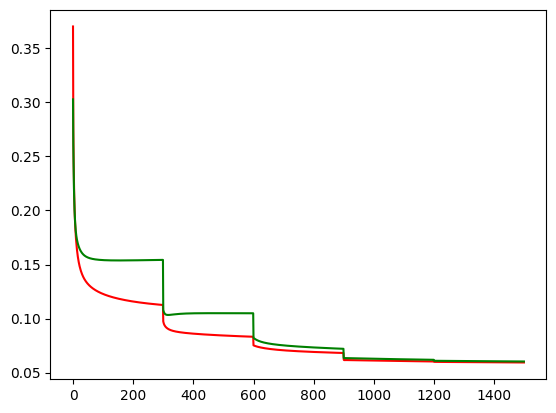

In [18]:
layers = [2, 4, class_count]
network = Perceptron(layers)

history = []
# train_network(self, x_train, y_train, x_test, y_test, l_rate, n_epoch, activation_func):
history += network.train_network(train_data, train_labels, test_data, test_labels, 0.4, 300, sigmoid)
history += network.train_network(train_data, train_labels, test_data, test_labels, 0.2, 300, sigmoid)
history += network.train_network(train_data, train_labels, test_data, test_labels, 0.1, 300, sigmoid)
history += network.train_network(train_data, train_labels, test_data, test_labels, 0.01, 300, sigmoid)
history += network.train_network(train_data, train_labels, test_data, test_labels, 0.005, 300, sigmoid)

history_np = np.array(history)

plt.plot(history_np[:, 0], c="r")
plt.plot(history_np[:, 1], c="g")
plt.show()

In [18]:
layers = [2, 4, class_count]
perceptron = Perceptron(layers)

errors = []
l_rate = 1000
min_border = 0
max_border = 8.5

# plt.ion()

errors += perceptron.train(train_data, train_labels, test_data, test_labels, 10, 100, sigmoid, False, min_border, max_border)
errors += perceptron.train(train_data, train_labels, test_data, test_labels, 1, 100, sigmoid, False, min_border, max_border)
errors += perceptron.train(train_data, train_labels, test_data, test_labels, 0.1, 100, sigmoid, False, min_border, max_border)
errors += perceptron.train(train_data, train_labels, test_data, test_labels, 0.01, 100, sigmoid, False, min_border, max_border)
errors += perceptron.train(train_data, train_labels, test_data, test_labels, 0.001, 100, sigmoid, False, min_border, max_border)

# plt.ioff()
# plt.show()
errors = np.array(errors)

In [19]:
plt.plot(errors[:, 0], c="r", label='train')
plt.plot(errors[:, 1], c="g", label='test')
plt.legend()
plt.show()

In [19]:
layers = [2, 4, class_count]
min_border = 0
max_border = 8.5

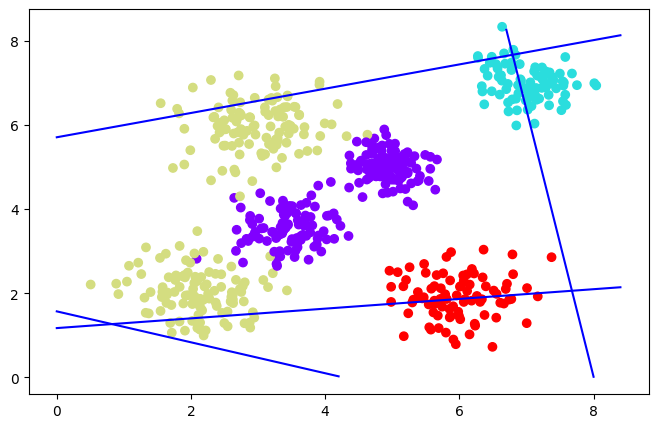

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(x_test['x'], x_test['y'], c=y_test, cmap='rainbow')
lines = get_lines(min_border, max_border, network)
for line in lines:
    plt.plot(line[0], line[1], c='b')

plt.show()

In [21]:
test_grid_x = []
test_grid_y = []
test_grid_res = []

for i in range(int(max_border * 10)):
    for j in range(int(max_border * 10)):
        test_grid_x.append(i/10)
        test_grid_y.append(j/10)

        res = perceptron.predict([i/10, j/10], sigmoid)
        test_grid_res.append(res.index(max(res)))

for line in lines:
    plt.plot(line[0], line[1], c='b')

plt.scatter(test_grid_x, test_grid_y, c=test_grid_res, s=1)
plt.show()

In [22]:
y_pred = []
for i in range(len(test_data)):
    y_pred.append(perceptron.predict(test_data[i], sigmoid))
y_pred = np.array(y_pred).argmax(axis=1)

In [23]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
plt.scatter(x_test['x'], x_test['y'], c=y_test, cmap='rainbow')
for line in lines:
    plt.plot(line[0], line[1], c='b')
plt.title('Real')

plt.subplot(122)
plt.scatter(x_test['x'], x_test['y'], c=y_pred, cmap='rainbow')
for line in lines:
    plt.plot(line[0], line[1], c='b')
plt.title('Predicted')

plt.show()

In [24]:
def add_point(new_x, new_y):
    new_point = pd.DataFrame([[new_x, new_y]], index=[df.index[-1] + 1], columns=['x', 'y'])
    new_label = pd.DataFrame([10], index=[labels.index[-1] + 1])

    return pd.concat([df, new_point]), pd.concat([labels, new_label]), pd.concat([x_test, new_point]), pd.concat([y_test, new_label])

In [25]:
def add_new_point(new_x, new_y) -> None:
    ndf, nlabels, nx_test, ny_test = add_point(new_x, new_y)
    nx_test_data = nx_test.values.tolist()

    ny_pred = []
    for i in range(len(nx_test_data)):
        ny_pred.append(perceptron.predict(nx_test_data[i], sigmoid))
    ny_pred = np.array(ny_pred).argmax(axis=1)

    plt.figure(figsize=(20, 7))
    plt.subplot(121)
    plt.scatter(nx_test['x'], nx_test['y'], c=ny_test, cmap='rainbow')
    for line in lines:
        plt.plot(line[0], line[1], c='b')
    plt.title('Real')

    plt.subplot(122)
    plt.scatter(nx_test['x'], nx_test['y'], c=ny_pred, cmap='rainbow')
    for line in lines:
        plt.plot(line[0], line[1], c='b')
    plt.title('Predicted')

    plt.show()

In [26]:
add_new_point(5, 7)

In [27]:
vartype = np.array(['real' for i in range(28)])
min_ = -20
max_ = 20
varbound = np.array([(min_, max_) for i in range(28)])

In [28]:
import copy


def make_copy(network):
    layers = []
    for i in range(len(network.layers)):
        s = 0
        for j in range(len(network.layers[i])):
            s += 1
        layers.append(s)
    new_net = Perceptron(layers)

    for i in range(len(network.layers)):
        for j in range(len(network.layers[i])):
            for k in range(len(network.layers[i][j].weights)):
                new_net.layers[i][j].weights[k] = copy.deepcopy(network.layers[i][j].weights[k])
            new_net.layers[i][j].output = copy.deepcopy(network.layers[i][j].output)

    return new_net

In [29]:
def F(a):
    nn = make_copy(perceptron)

    nn.layers[1][0].weights = copy.deepcopy(a[0:3])
    nn.layers[1][1].weights = copy.deepcopy(a[3:6])
    nn.layers[1][2].weights = copy.deepcopy(a[6:9])
    nn.layers[1][3].weights = copy.deepcopy(a[9:12])

    nn.layers[1][0].output = copy.deepcopy(a[12])
    nn.layers[1][1].output = copy.deepcopy(a[13])
    nn.layers[1][2].output = copy.deepcopy(a[14])
    nn.layers[1][3].output = copy.deepcopy(a[15])

    nn.layers[2][0].weights = copy.deepcopy(a[16:21])
    nn.layers[2][1].weights = copy.deepcopy(a[21:26])

    nn.layers[2][0].output = copy.deepcopy(a[26])
    nn.layers[2][1].output = copy.deepcopy(a[27])

    sum_error_train = 0
    for i in range(len(train_data)):
        outputs = nn.predict(train_data[i], sigmoid)
        sum_error_train += math.sqrt(sum([(train_labels[i][j] - outputs[j]) ** 2 for j in range(len(train_labels[i]))]) / len(outputs))

    return sum_error_train / len(train_data)

def FF(network_o, a):
    nn = make_copy(network_o)

    nn.layers[1][0].weights = copy.deepcopy(a[0:3])
    nn.layers[1][1].weights = copy.deepcopy(a[3:6])
    nn.layers[1][2].weights = copy.deepcopy(a[6:9])
    nn.layers[1][3].weights = copy.deepcopy(a[9:12])

    nn.layers[1][0].output = copy.deepcopy(a[12])
    nn.layers[1][1].output = copy.deepcopy(a[13])
    nn.layers[1][2].output = copy.deepcopy(a[14])
    nn.layers[1][3].output = copy.deepcopy(a[15])

    nn.layers[2][0].weights = copy.deepcopy(a[16:21])
    nn.layers[2][1].weights = copy.deepcopy(a[21:26])

    nn.layers[2][0].output = copy.deepcopy(a[26])
    nn.layers[2][1].output = copy.deepcopy(a[27])

    return nn

In [30]:
from geneticalgorithm2 import geneticalgorithm2 as ga, AlgorithmParams, Mutations, Selection

In [31]:
from random import random

def my_crossover(a: np.ndarray, b: np.ndarray):
    ind1 = copy.deepcopy(a)
    ind2 = copy.deepcopy(b)

    eta = 0.5

    for i, (x1, x2) in enumerate(zip(ind1, ind2)):
        rand = random()
        if rand <= 0.5:
            beta = 2. * rand
        else:
            beta = 1. / (2. * (1. - rand))
        beta **= 1. / (eta + 1.)
        ind1[i] = 0.5 * (((1 + beta) * x1) + ((1 - beta) * x2))
        ind2[i] = 0.5 * (((1 - beta) * x1) + ((1 + beta) * x2))


        if ind1[i] > varbound[i, 1]:
            ind1[i] = varbound[i, 1]
        if ind2[i] > varbound[i, 1]:
            ind2[i] = varbound[i, 1]
        if ind1[i] < varbound[i, 0]:
            ind1[i] = varbound[i, 0]
        if ind2[i] < varbound[i, 0]:
            ind2[i] = varbound[i, 0]

    return ind1, ind2

In [32]:
model_smart = ga(
    F,
    dimension = 28,
    variable_type='real',
    variable_boundaries = varbound,
    function_timeout = None,
    algorithm_parameters=AlgorithmParams(
        max_num_iteration = 100,
        population_size = 100,
        mutation_probability = 0.2,
        elit_ratio = 0.01,
        crossover_type = my_crossover,
        mutation_type = Mutations.gauss_by_center(sd = 0.2),
        selection_type = Selection.stochastic(),
        max_iteration_without_improv = 50
    )
)

In [33]:
def my_callback(data):
    gen = data.last_generation
    best_index = np.argmin([F(gen.variables[i]) for i in range(len(gen.variables))])
    nn = FF(copy.deepcopy(perceptron), gen.variables[best_index])

    plt.subplots(figsize=(10,8))

    plt.scatter(x_train['x'], x_train['y'], c=y_train, cmap='rainbow')

    nn_lines = get_lines(min_border, max_border, nn)
    for line in nn_lines:
        plt.plot(line[0], line[1], c='b')

    return data

In [ ]:
from geneticalgorithm2 import MiddleCallbacks, ActionConditions

result = model_smart.run(
    middle_callbacks = [
        MiddleCallbacks.UniversalCallback(
            my_callback,
            ActionConditions.EachGen(generation_step = 50)
        )
    ]
)


Set: Average time of function evaluating (secs): 0.10161256313323974 (total = 10.161256313323975)

Best score before optimization: 0.3835843955930874
||||||||||__________ 51.0% GA is running...51 gen from 100...best value = 0.19646283321525236

GAResult(last_generation=Generation(variables=array([[ -1.559042  ,   5.76313497, -11.54429387, ..., -16.26687937,
          5.66206645,  -6.63953356],
       [ -1.559042  ,   5.76313497, -11.54429458, ..., -16.26687937,
          6.41100721,  -6.66818737],
       [ -1.559042  ,   5.76313497, -11.54429461, ..., -16.26687937,
         20.        ,  -6.77375246],
       ...,
       [ -1.559042  ,   5.76313497, -11.5442902 , ..., -16.26687937,
          9.20254787,  -6.69800893],
       [ -1.559042  ,   5.76313497, -11.54429522, ...,  -6.78128965,
         18.37607372,  -6.75752307],
       [ -1.559042  ,   5.76313497, -11.54429522, ...,  15.31288608,
         18.37607372,  -6.35556114]]), scores=array([0.1805639 , 0.18056464, 0.18056586, 0.18057076, 0.1805709 ,
       0.18057663, 0.18057663, 0.18057663, 0.18057663, 0.18057663,
       0.18057663, 0.18057663, 0.18057663, 0.18057663, 0.18057663,
       0.18057663, 0.18057663, 0.18057663, 0.18057663, 0.18057663,
       0.18057663, 0.18057663

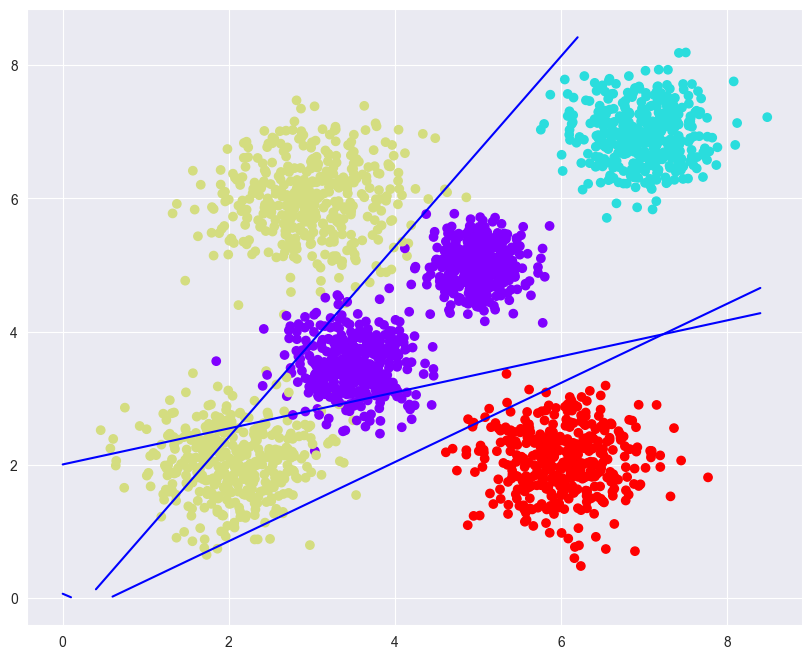

In [68]:
my_callback(result)

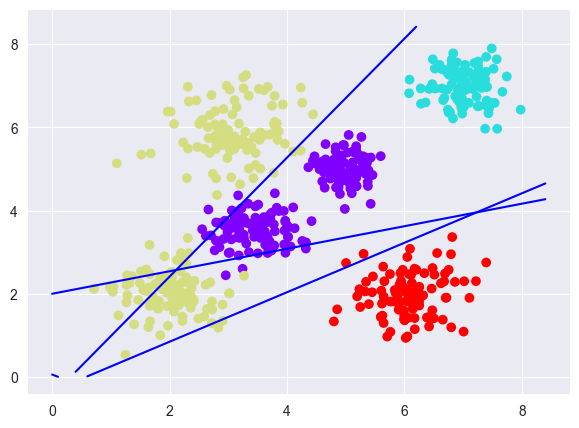

In [70]:
plt.subplots(figsize=(7,5))

nn = FF(copy.deepcopy(perceptron), result.variable)

plt.scatter(x_test['x'], x_test['y'], c=y_test, cmap='rainbow')

nn_lines = get_lines(min_border, max_border, nn)
for line in nn_lines:
    plt.plot(line[0], line[1], c='b')